# Wave forecasting with neural networks
The the aim is to predict the wave height at WaveHub (nearshore) from the wave height at 3 other offshore wave buoys.


<ul style="list-style-type:disc">
    <li>M3 - offshore to the west</li>
    <li>M5 -  offshore to the north</li>
    <li>Isleof Scilly - offshore to the south</li>
</ul>

<img src="Map.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load wavehub data
df_wavehub = pd.read_csv(r'Hub_waves_all_years.txt', sep='\t')
df_wavehub[r'Date/Time (GMT)'] = pd.to_datetime(df_wavehub[r'Date/Time (GMT)'] , infer_datetime_format=True)
df_wavehub['Hs (Hm0)(m)'] = df_wavehub['Hs (Hm0)(m)'].replace(9999, np.nan)
df_wavehub.set_index('Date/Time (GMT)', inplace = True)

In [3]:
# Load Isle of Scilly datasets
df_IOS =  pd.read_csv(r'.\WaveNet-Downloaded-Data-2020-05-11T20_19_40\sw-isles-of-scilly-wavenet-sitev2.csv', sep=',')
df_IOS['Time (GMT)'] = pd.to_datetime(df_IOS['Time (GMT)'], infer_datetime_format=True)
df_IOS.sort_values(by=['Time (GMT)'], inplace = True)
df_IOS.set_index('Time (GMT)', inplace = True)

In [4]:
# Load Penzance data
df_penzance = pd.read_csv(r'Pnz_waves_all_years.txt', sep='\t')
df_penzance[r'Date/Time (GMT)'] = pd.to_datetime(df_penzance[r'Date/Time (GMT)'] , infer_datetime_format=True)
df_penzance['Hs (Hm0)(m)'] = df_penzance['Hs (Hm0)(m)'].replace(9999, np.nan)
df_penzance.set_index('Date/Time (GMT)', inplace = True)
df_penzance.rename(columns={'Hs (Hm0)(m)': 'Hs (Hm0)(m)_PZ'}, inplace=True)

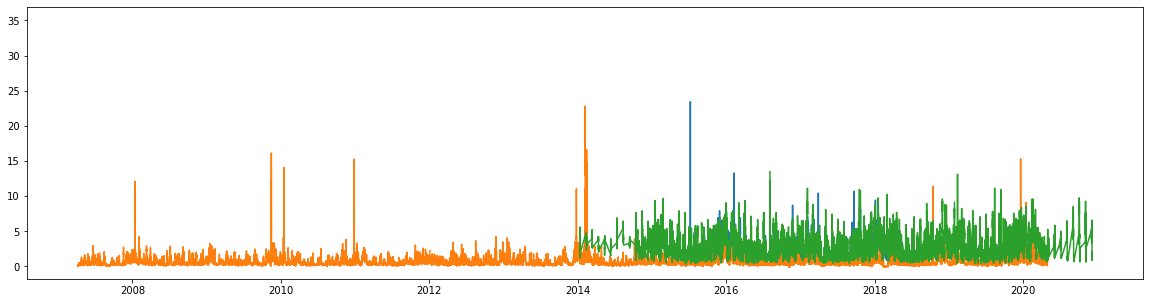

In [5]:
_, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_wavehub.index,df_wavehub['Hs (Hm0)(m)'], )
ax.plot(df_penzance.index,df_penzance['Hs (Hm0)(m)_PZ'], )
ax.plot(df_IOS.index,df_IOS['Significant wave height (Hm0) (m)'], )

In [6]:
# Join all the dataframes togeather with the datetime index
df_data = df_wavehub.join(df_IOS, how='outer', rsuffix='_1').join(df_penzance, how='outer', rsuffix='_2')
df_data.head()

Latitude  Longitude  Flag  Hs (Hm0)(m)  Hmax (m)  Tp (s)  \
2007-04-01 00:00:00       NaN        NaN   NaN          NaN       NaN     NaN   
2007-04-01 00:30:00       NaN        NaN   NaN          NaN       NaN     NaN   
2007-04-01 01:00:00       NaN        NaN   NaN          NaN       NaN     NaN   
2007-04-01 01:30:00       NaN        NaN   NaN          NaN       NaN     NaN   
2007-04-01 02:00:00       NaN        NaN   NaN          NaN       NaN     NaN   

                     Tz (Tm)(s)  Dirp (degrees)  Spread (deg)  SST (deg C)  \
2007-04-01 00:00:00         NaN             NaN           NaN          NaN   
2007-04-01 00:30:00         NaN             NaN           NaN          NaN   
2007-04-01 01:00:00         NaN             NaN           NaN          NaN   
2007-04-01 01:30:00         NaN             NaN           NaN          NaN   
2007-04-01 02:00:00         NaN             NaN           NaN          NaN   

                     ...  Latitude_2  Longitude_2  Flag_2  Hs (Hm0)(m)_PZ  \
2007-04-01 00:00:00  ...      9999.0       9999.0     9.0             NaN   
2007-04-01 00:30:00  ...      9999.0       9999.0     9.0             NaN   
2007-04-01 01:00:00  ...      9999.0       9999.0     9.0             NaN   
2007-04-01 01:30:00  ...      9999.0       9999.0     9.0             NaN   
2007-04-01 02:00:00  ...      9999.0       9999.0     9.0             NaN   

                     Hmax (m)_2  Tp (s)_2  Tz (Tm)(s)_2  Dirp (degrees)_2  \
2007-04-01 00:00:00      9999.0    9999.0        9999.0            9999.0   
2007-04-01 00:30:00      9999.0    9999.0        9999.0            9999.0   
2007-04-01 01:00:00      9999.0    9999.0        9999.0            9999.0   
2007-04-01 01:30:00      9999.0    9999.0        9999.0            9999.0   
2007-04-01 02:00:00      9999.0    9999.0        9999.0            9999.0   

                     Spread (deg)_2  SST (deg C)_2  
2007-04-01 00:00:00          9999.0         9999.0  
2007-04-01 00:30:00          9999.0         9999.0  
2007-04-01 01:00:00          9999.0         9999.0  
2007-04-01 01:30:00          9999.0         9999.0  
2007-04-01 02:00:00          9999.0         9999.0  

[5 rows x 26 columns]

In [7]:
# Note the Isle of Scilly data is much longer than the other datasets.
# We will crop most of this in this next step as it is not useful (non-coincidetn with other data)
# df_data.info()
print('Original data', df_data.shape)
df_data = df_data['2015':'2019']
print('Filtered data', df_data.shape)


Original data (231253, 26)
Filtered data (87648, 26)


In [8]:
df_data.head()
df_data = df_data[['Significant wave height (Hm0) (m)', 'Hs (Hm0)(m)', 'Hs (Hm0)(m)_PZ']]
df_data.columns = ['IOS_Hm0', 'WaveHub_Hm0', 'Penzance_Hm0']
df_data.head()

IOS_Hm0  WaveHub_Hm0  Penzance_Hm0
2015-01-01 00:00:00     2.93          NaN          1.54
2015-01-01 00:30:00     3.04          NaN          1.54
2015-01-01 01:00:00     2.93          NaN          1.48
2015-01-01 01:30:00     3.04          NaN          1.49
2015-01-01 02:00:00     2.71          NaN          1.48

In [9]:
# Fill in missing data
imputed = np.nanmean(df_data.values[:, 3:], axis=1)

cols = ['IOS_Hm0', 'WaveHub_Hm0', 'Penzance_Hm0']

for c in cols:
    df_data[c] = np.where(df_data[c].isna(), imputed, df_data[c])

df_data = df_data.dropna()

C:\Users\DAW85586\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [10]:
df_data.tail()

IOS_Hm0  WaveHub_Hm0  Penzance_Hm0
2018-05-31 21:00:00     1.49         1.16          0.27
2018-05-31 21:30:00     1.49         1.18          0.26
2018-05-31 22:00:00     1.39         1.17          0.26
2018-05-31 22:30:00     1.60         1.20          0.26
2018-05-31 23:00:00     1.36         1.13          0.25

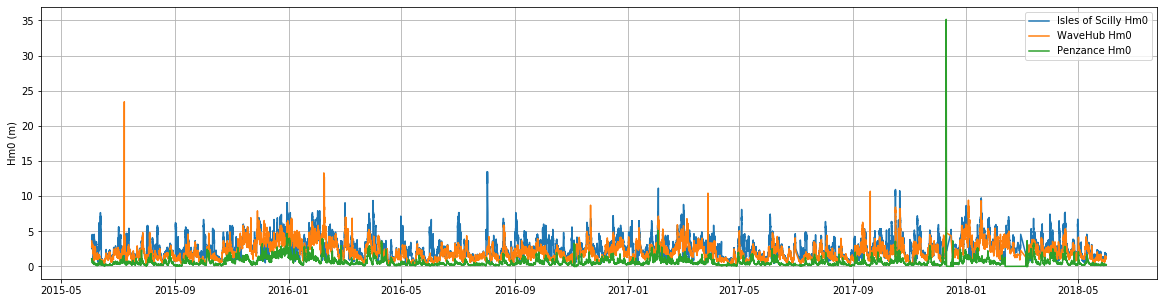

In [11]:
_, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_data.index,df_data['IOS_Hm0'], label = 'Isles of Scilly Hm0')
ax.plot(df_data.index,df_data['WaveHub_Hm0'], label = 'WaveHub Hm0')
ax.plot(df_data.index,df_data['Penzance_Hm0'], label = 'Penzance Hm0')
plt.legend()
plt.ylabel('Hm0 (m)')
plt.grid()

DO SOME MORE STATS HERE!!!!!!!

Steal some data processing from that blog post:

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler_feat = MinMaxScaler(feature_range=(0, 1))
scaled_feat = scaler_feat.fit_transform(df_data[df_data.columns[1:]].values)

scaler_tar = MinMaxScaler(feature_range=(0, 1))
scaled_tar = scaler_tar.fit_transform(df_data[df_data.columns[0]].values.reshape(len(df_data), 1))

In [13]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [14]:
lag_steps = 6

reframed_in = series_to_supervised(scaled_feat, lag_steps, 1, dropnan=False)
reframed_in = reframed_in[lag_steps:].reset_index(drop=True)

scaled_tar = scaled_tar[lag_steps:,:]
print(reframed_in.shape, scaled_tar.shape)
reframed_in.head()

(48910, 14) (48910, 1)


var1(t-6)  var2(t-6)  var1(t-5)  var2(t-5)  var1(t-4)  var2(t-4)  \
0   0.146919   0.031286   0.146919   0.029579   0.146919   0.027019   
1   0.146919   0.029579   0.146919   0.027019   0.146919   0.026735   
2   0.146919   0.027019   0.146919   0.026735   0.146919   0.026451   
3   0.146919   0.026735   0.146919   0.026451   0.146919   0.023606   
4   0.146919   0.026451   0.146919   0.023606   0.115467   0.024175   

   var1(t-3)  var2(t-3)  var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)   var1(t)  \
0   0.146919   0.026735   0.146919   0.026451   0.146919   0.023606  0.115467   
1   0.146919   0.026451   0.146919   0.023606   0.115467   0.024175  0.116329   
2   0.146919   0.023606   0.115467   0.024175   0.116329   0.024460  0.121499   
3   0.115467   0.024175   0.116329   0.024460   0.121499   0.023322  0.113744   
4   0.116329   0.024460   0.121499   0.023322   0.113744   0.025313  0.110728   

    var2(t)  
0  0.024175  
1  0.024460  
2  0.023322  
3  0.025313  
4  0.025313

In [15]:
sample_split = 0.8

train_X = (reframed_in.values[0:int(sample_split * len(reframed_in.values))])
test_X = (reframed_in.values[int(sample_split * len(reframed_in.values)):])

train_y = (scaled_tar[0:int(sample_split * scaled_tar.shape[0]),:])
test_y = (scaled_tar[int(sample_split * scaled_tar.shape[0]):,:])

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(39128, 1, 14) (39128, 1) (9782, 1, 14) (9782, 1)



Steal the neural network from the other network:

Train on 39128 samples, validate on 9782 samples
Epoch 1/100
 - 2s - loss: 0.0626 - val_loss: 0.0567
Epoch 2/100
 - 2s - loss: 0.0579 - val_loss: 0.0556
Epoch 3/100
 - 2s - loss: 0.0577 - val_loss: 0.0556
Epoch 4/100
 - 2s - loss: 0.0576 - val_loss: 0.0556
Epoch 5/100
 - 2s - loss: 0.0575 - val_loss: 0.0557
Epoch 6/100
 - 2s - loss: 0.0574 - val_loss: 0.0557
Epoch 7/100
 - 1s - loss: 0.0574 - val_loss: 0.0558
Epoch 8/100
 - 2s - loss: 0.0573 - val_loss: 0.0558
Epoch 9/100
 - 1s - loss: 0.0573 - val_loss: 0.0559
Epoch 10/100
 - 2s - loss: 0.0573 - val_loss: 0.0559
Epoch 11/100
 - 1s - loss: 0.0572 - val_loss: 0.0560
Epoch 12/100
 - 2s - loss: 0.0572 - val_loss: 0.0560
Epoch 13/100
 - 1s - loss: 0.0571 - val_loss: 0.0561
Epoch 14/100
 - 2s - loss: 0.0571 - val_loss: 0.0561
Epoch 15/100
 - 2s - loss: 0.0571 - val_loss: 0.0562
Epoch 16/100
 - 2s - loss: 0.0571 - val_loss: 0.0562
Epoch 17/100
 - 2s - loss: 0.0570 - val_loss: 0.0563
Epoch 18/100
 - 1s - loss: 0.0570 - val_loss: 0.0564
Epoch 

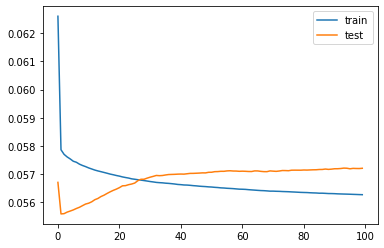

In [21]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM

# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), recurrent_dropout=0.1))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(
    train_X,
    train_y,
    epochs=100,
    batch_size=72,
    validation_data=(test_X, test_y),
    verbose=2,
    shuffle=False
)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [22]:
yhat = model.predict(test_X)
xhat = model.predict(train_X)

In [23]:
inv_yhat = scaler_tar.inverse_transform(yhat)
inv_y = scaler_tar.inverse_transform(test_y)

inv_xhat = scaler_tar.inverse_transform(xhat)
inv_x = scaler_tar.inverse_transform(train_y)

C:\Users\DAW85586\Anaconda3\envs\ML\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


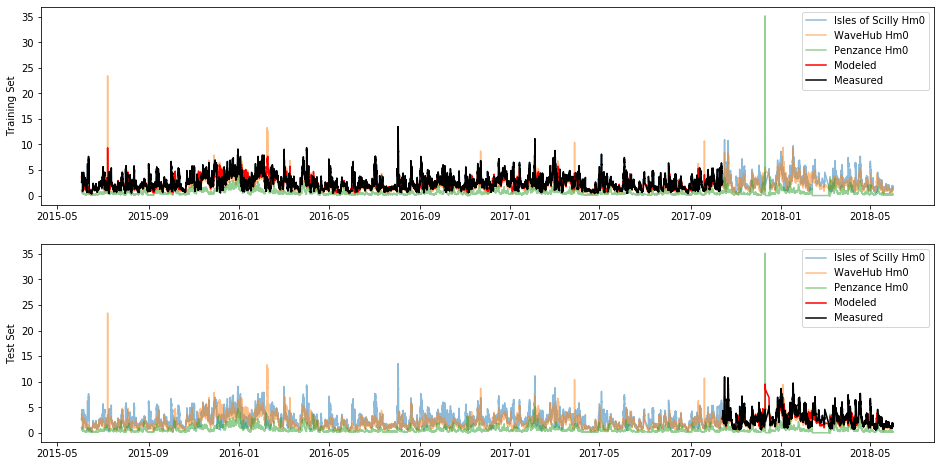

In [24]:
dates = df_data.index[lag_steps:]

train_dates = dates[0:int(sample_split * scaled_tar.shape[0])]
test_dates = dates[int(sample_split * scaled_tar.shape[0]):]

fig, axs = plt.subplots(2, figsize=(16, 8))

axs[0].plot(df_data.index,df_data['IOS_Hm0'], label = 'Isles of Scilly Hm0', alpha = 0.5)
axs[0].plot(df_data.index,df_data['WaveHub_Hm0'], label = 'WaveHub Hm0', alpha = 0.5)
axs[0].plot(df_data.index,df_data['Penzance_Hm0'], label = 'Penzance Hm0', alpha = 0.5)

axs[0].plot(train_dates, inv_xhat, label='Modeled', color='r')
axs[0].plot(train_dates, inv_x, label='Measured', color='k')
axs[0].set_ylabel('Training Set')
axs[0].legend()


axs[1].plot(df_data.index,df_data['IOS_Hm0'], label = 'Isles of Scilly Hm0', alpha = 0.5)
axs[1].plot(df_data.index,df_data['WaveHub_Hm0'], label = 'WaveHub Hm0', alpha = 0.5)
axs[1].plot(df_data.index,df_data['Penzance_Hm0'], label = 'Penzance Hm0', alpha = 0.5)

axs[1].plot(test_dates, inv_yhat, label='Modeled', color='r')
axs[1].plot(test_dates, inv_y, label='Measured', color='k')
axs[1].set_ylabel('Test Set')
axs[1].legend()

(0, 15)

C:\Users\DAW85586\Anaconda3\envs\ML\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


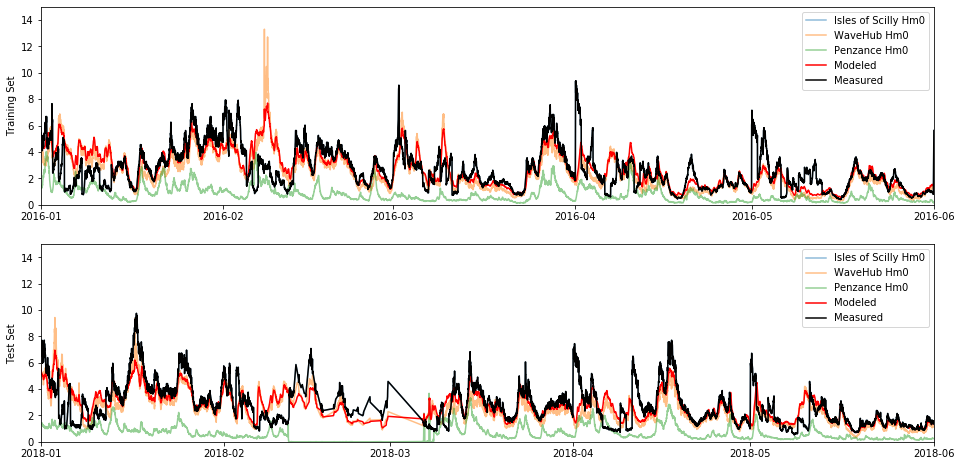

In [25]:
import datetime
fig, axs = plt.subplots(2, figsize=(16, 8))

axs[0].plot(df_data.index,df_data['IOS_Hm0'], label = 'Isles of Scilly Hm0', alpha = 0.5)
axs[0].plot(df_data.index,df_data['WaveHub_Hm0'], label = 'WaveHub Hm0', alpha = 0.5)
axs[0].plot(df_data.index,df_data['Penzance_Hm0'], label = 'Penzance Hm0', alpha = 0.5)

axs[0].plot(train_dates, inv_xhat, label='Modeled', color='r')
axs[0].plot(train_dates, inv_x, label='Measured', color='k')
axs[0].set_ylabel('Training Set')
axs[0].legend()
axs[0].set_xlim([datetime.datetime(2016,1,1), datetime.datetime(2016,6,1)])
axs[0].set_ylim([0,15])

axs[1].plot(df_data.index,df_data['IOS_Hm0'], label = 'Isles of Scilly Hm0', alpha = 0.5)
axs[1].plot(df_data.index,df_data['WaveHub_Hm0'], label = 'WaveHub Hm0', alpha = 0.5)
axs[1].plot(df_data.index,df_data['Penzance_Hm0'], label = 'Penzance Hm0', alpha = 0.5)

axs[1].plot(test_dates, inv_yhat, label='Modeled', color='r')
axs[1].plot(test_dates, inv_y, label='Measured', color='k')
axs[1].set_ylabel('Test Set')
axs[1].legend()
axs[1].set_xlim([datetime.datetime(2018,1,1), datetime.datetime(2018,6,1)])
axs[1].set_ylim([0,15])
